The urban area has the highest percentage of fare, highest percentage of riders and the highest percentage of drivers.
The rural area has the lowest percentage of fare, lowest percentage of riders and the lowest percentage of drivers.
The suburban area has the second highest percentage of fare, second highest percentage of riders and the second highest percentage of drivers.

In [2]:
%matplotlib inline 

In [3]:
# Import all dependencies that will be needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Load in the csv file 
city_df = pd.read_csv("raw_data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df = pd.read_csv("raw_data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#Merge both tables 
merge_table_df = pd.merge(city_df, ride_df, on="city")
merge_table_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
# Merge table by city'group' 
city_group = merge_table_df.groupby('city')

In [8]:
# Calculating the average Fare($) per city
average_fare = city_group['fare'].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [37]:
#Calculating the total number of rides per city  
total_ride = city_group['ride_id'].count()
total_ride.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [46]:
#Calculating the total number of drivers per city 
total_drivers = city_group['driver_count'].unique().astype(int)
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int32

In [47]:
#Returning the city types
city_type = city_df.set_index('city')['type']
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [48]:
city_rider = pd.DataFrame({"Average Fare":average_fare, 
                          "Total number of Rides":total_ride,
                          "Total number of Drivers":total_drivers,
                         "Type of city":city_type })

city_rider.head()

,Average Fare,Total number of Drivers,Total number of Rides,Type of city
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural


In [49]:
#seperating the cities by types
rural= city_rider[city_rider['Type of city']=='Rural']

urban = city_rider[city_rider['Type of city']=='Urban']

suburban= city_rider[city_rider['Type of city']=='Suburban']

In [50]:
urban_ride_count = urban['Total number of Rides']
urban_average_fare = urban['Average Fare']
urban_driver_count = urban['Total number of Drivers']

rural_ride_count = rural['Total number of Rides']
rural_average_fare = rural['Average Fare']
rural_driver_count = rural['Total number of Drivers']

suburban_ride_count = suburban['Total number of Rides']
suburban_average_fare = suburban['Average Fare']
suburban_driver_count = suburban['Total number of Drivers']

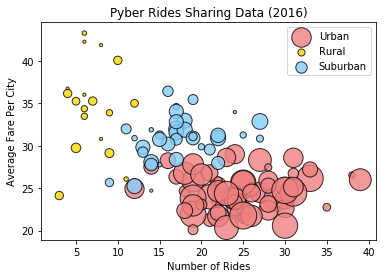

In [51]:
plt.scatter(urban_ride_count, 
            urban_average_fare, 
            s=10*urban_driver_count, c="lightcoral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(rural_ride_count, 
            rural_average_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count, 
            suburban_average_fare, 
            s=10*suburban_driver_count, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

# #Add title, x axis label and y axis label.
plt.title("Pyber Rides Sharing Data (2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# the legend.
plt.legend(loc= "upper right")

plt.show()

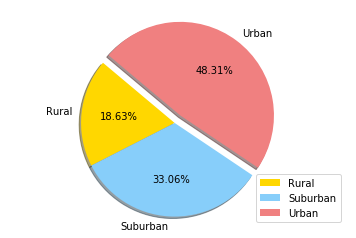

In [53]:
#Calculating the percentage of "total fare" by city type
total_fare = city_rider.groupby(["Type of city"])["Average Fare"].sum() 

# PLoting the percentage of "total fare" by city type 
colors = ["gold","lightskyblue","lightcoral"]

explode = (0,0,0.1)

plt.pie(total_fare, 
        labels = total_fare.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show()

<function matplotlib.pyplot.show>

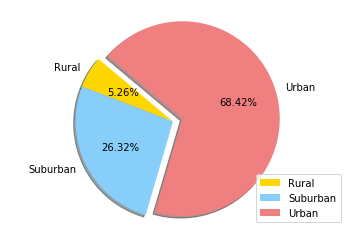

In [54]:
#Calculating the Total Rides by City Type
total_rides = city_rider.groupby(["Type of city"])["Total number of Rides"].sum()

# PLoting the percentage of "total rides" by city type 
explode = (0,0,0.1)

plt.pie(total_rides, 
        labels = total_rides.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show

<function matplotlib.pyplot.show>

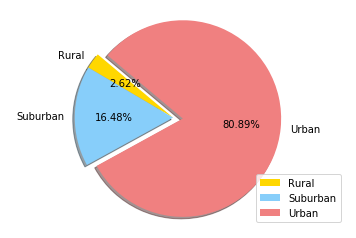

In [55]:
#Calculating the percentage of total "Drivers" by city type
total_drivers = city_rider.groupby(["Type of city"])["Total number of Drivers"].sum()

# PLoting the percentage of "total drivers" by city type 
explode = (0,0,0.1)


#the pie chart for total drivers
plt.pie(total_drivers, 
        labels = total_drivers.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show